In [1]:
import uproot as uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [2]:
f = uproot.open("/data1/hagaman/xin_files/processed_checkout_rootfiles/prodgenie_bnb_nc_delta_overlay_run1_PF/UBGenieFluxSmallUni.root")

In [3]:
#f["wcpselection"].items()

In [4]:
#f["wcpselection"]["T_weight"].items()

In [5]:
genie_all_weights = f["wcpselection"]["T_weight"]["All_UBGenie"].array().to_numpy()
cv_weights = f["wcpselection"]["T_weight"]["weight_cv"].array().to_numpy()
spline_weights = f["wcpselection"]["T_weight"]["weight_spline"].array().to_numpy()

print(genie_all_weights.shape, cv_weights.shape, spline_weights.shape)

(40522, 600) (40522,) (40522,)


In [6]:
total_genie_all_weights = []
for i in tqdm(range(genie_all_weights.shape[1])): # looping over universes
    total_weight = 0
    for j in range(genie_all_weights.shape[0]): # looping over events
        total_weight += genie_all_weights[j,i] * spline_weights[j]
    total_genie_all_weights.append(total_weight)
    
total_cv_genie_weight = np.sum(cv_weights * spline_weights)


  0%|          | 0/600 [00:00<?, ?it/s]

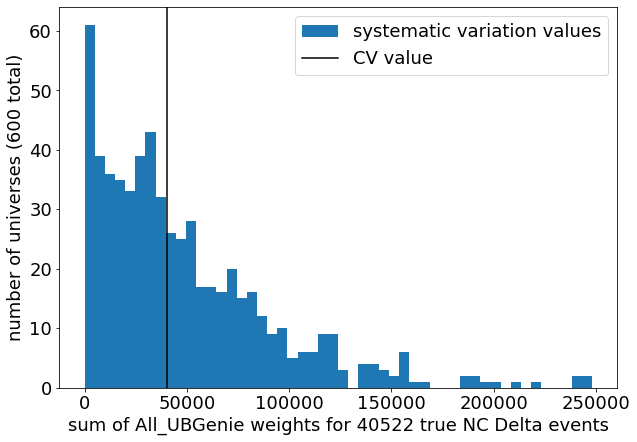

In [7]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10, 7))
plt.hist(total_genie_all_weights, bins=50, label="systematic variation values")
plt.axvline(total_cv_genie_weight, c="k", label="CV value")
plt.xlabel(f"sum of All_UBGenie weights for 40522 true NC Delta events")
plt.ylabel("number of universes (600 total)")
plt.legend()
plt.show()

In [8]:
diffs = total_genie_all_weights - total_cv_genie_weight

covariance = np.sum(diffs * diffs) / genie_all_weights.shape[1]

print("from manual investigation of All_UBGenie weights in different universes for the run 1 NC Delta file:\n")

print("CV value: ", total_cv_genie_weight)
print("variance: ", covariance)
print("fractional variance: ", covariance / (total_cv_genie_weight * total_cv_genie_weight))

from manual investigation of All_UBGenie weights in different universes for the run 1 NC Delta file:

CV value:  40522.0
variance:  1998011870.6090064
fractional variance:  1.216791906376703


In [9]:
f = uproot.open(f"~/wc_framework/LEEana/merge.root")
for k in f.keys():
    print(k)
    


mat_collapse;1
cov_mat_add;1
histo_2;1
histo_1;1
hdata_obsch_1;1
hmc_obsch_1;1


In [10]:
all_mc_preds = []
is_sig = []
    
for i in range(1, 3): # 1 is mc predictions, 2 is ext
    current_preds = list(f[f"histo_{i}"].to_numpy(flow=True)[0][1:])
    all_mc_preds += current_preds # get the overflow bin only

idx = 17

f_xs_cov = uproot.open(f"~/wc_framework/LEEana/hist_rootfiles/XsFlux/cov_{idx}.root")
#f_xs_cov = uproot.open(f"../LEEana/hist_rootfiles/XsFlux/cov_{idx}.root")

cov_mat_frac = f_xs_cov[f"frac_cov_xf_mat_{idx}"].member("fElements")
#print(cov_mat_frac.shape, 272*272)
cov_mat_frac = cov_mat_frac.reshape((4, 4))

cov_mat = f_xs_cov[f"cov_xf_mat_{idx}"].member("fElements")
#print(cov_mat.shape, 272*272)
cov_mat = cov_mat.reshape((4, 4))

vec_mean = f_xs_cov[f"vec_mean_{idx}"].member("fElements")

print(vec_mean)

[0.02565803 0.         0.         0.        ]


In [11]:
print("after running with the framework with just the 1gNp true Np NC Delta signal bin:\n")

print("mc pred from merge.root: ", all_mc_preds)
print("vec mean from cov_17.root: ", vec_mean)

print("\nvariance from cov_xf_mat_17 in cov_17.root: ", cov_mat[0][0])
print("fractional variance from frac_cov_xf_mat_17 in cov_17.root: ", cov_mat_frac[0][0])

print("\nmanually calculated fractional variance from merge.root and cov_xf_mat_17 in cov_17.root: ", cov_mat[0][0] / (all_mc_preds[0] * all_mc_preds[0]))
print("manually calculated fractional variance from vec_mean_17 and cov_xf_mat_17 in cov_17.root: ", cov_mat[0][0] / (vec_mean[0] * vec_mean[0]))


after running with the framework with just the 1gNp true Np NC Delta signal bin:

mc pred from merge.root:  [0.493263, 0.0, 0.0, 0.0]
vec mean from cov_17.root:  [0.02565803 0.         0.         0.        ]

variance from cov_xf_mat_17 in cov_17.root:  0.0006773613524666683
fractional variance from frac_cov_xf_mat_17 in cov_17.root:  1.0289011875743572

manually calculated fractional variance from merge.root and cov_xf_mat_17 in cov_17.root:  0.0027839621072529163
manually calculated fractional variance from vec_mean_17 and cov_xf_mat_17 in cov_17.root:  1.0289011875743572
